In [1]:
import json
with open('schulen.json') as f:
    x = json.load(f)

In [2]:
import osmnx as ox
# get the building footprints in Macclesfield
place = "Landkreis Breisgau-Hochschwarzwald"
#tags = {'building': 'school'}
# Ebene Landkreis
tags = {'admin_level': '6'}
#gdf = ox.geometries_from_place(place, tags)

#tags = {'boundary': 'administrative'}   

bh_osmid='R1946367'
lk_bh=ox.geocode_to_gdf(bh_osmid, by_osmid=True)
lk_bh_poly=lk_bh.geometry[0]

In [3]:
# Ebene Gemeinde
tags = {'admin_level': '8'}
gdf =ox.features.features_from_polygon(lk_bh_poly,tags)

In [4]:
in_bh=gdf.within(lk_bh_poly)
gem_in_bh_gdf=gdf[in_bh & (gdf['name'].notnull()) & (gdf['type'] == 'boundary') ]  

In [5]:
gem_in_bh_gdf

name                  name:ru  \
element_type osmid                                                           
relation     70124                      Bötzingen                Бётцинген   
             70125                    Eichstetten                      NaN   
             70133              Breisach am Rhein                      NaN   
             70142                       Ihringen                      NaN   
             70147       Vogtsburg im Kaiserstuhl  Фогтсбург (Кайзерштуль)   
             70178                      Merdingen                      NaN   
             70193                      Heuweiler                      NaN   
             70202                     Glottertal                      NaN   
             72264                     Münstertal                      NaN   
             74025                       Oberried                      NaN   
             74462                         Stegen                      NaN   
             93594            Staufen im Breisgau                      NaN   
             270514            Neuenburg am Rhein                      NaN   
             270537                   Heitersheim                      NaN   
             271658                      Sulzburg                      NaN   
             271661                     Buggingen                      NaN   
             276112         Ballrechten-Dottingen     Бальрехтен-Доттинген   
             308237                    Buchenbach                      NaN   
             308238                    St. Märgen                      NaN   
             310540                   Kirchzarten                      NaN   
             311915                   Badenweiler                      NaN   
             311922   Müllheim im Markgräflerland                      NaN   
             317425                      Breitnau                      NaN   
             317469                    Schluchsee                      NaN   
             317596                  Hinterzarten                      NaN   
             317609        Feldberg (Schwarzwald)                Фельдберг   
             317630                     Lenzkirch                      NaN   
             319152                     Eisenbach                      NaN   
             319155              Titisee-Neustadt                      NaN   
             319270                 Friedenweiler                      NaN   
             319271                     Löffingen                      NaN   
             1946216                  Schallstadt                      NaN   
             1946217                  Bollschweil                      NaN   
             1946218                     Ebringen                      NaN   
             1946219                Pfaffenweiler                      NaN   
             1946220                 Ehrenkirchen                      NaN   
             1946227                      Wittnau                      NaN   
             1946230                           Au                      NaN   
             1946232                       Sölden                      NaN   
             1946233                   Merzhausen                      NaN   
             1948624                       Horben                      NaN   
             1950429                    St. Peter                      NaN   
             1953880                   Gottenheim                      NaN   
             1954582                        March                      NaN   
             1955551                      Umkirch                      NaN   
             1959388                Bad Krozingen                      NaN   
             1959389            Hartheim am Rhein                      NaN   
             1959405                     Eschbach                      NaN   
             1965078                       Auggen                      NaN   
             1970196                 Gundelfingen                  

In [6]:
eki=gem_in_bh_gdf[gem_in_bh_gdf["name"]=='Ehrenkirchen']

<Axes: >

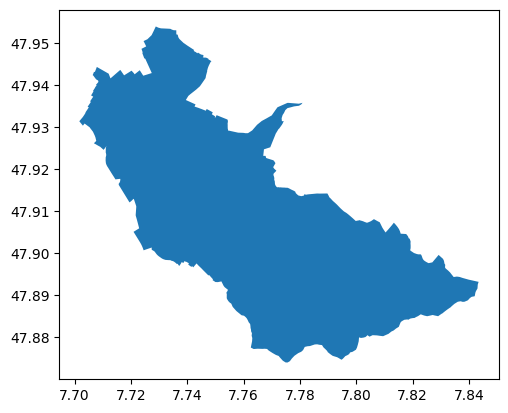

In [7]:
eki.plot()

In [8]:
eki_poly=eki.geometry[0]

network_type = "walk"
trip_times = [5, 10, 15, 20, 25,30,40]  # in minutes
travel_speed = 3  # walking speed in km/hour
# get one color for each isochrone
iso_colors = ox.plot.get_colors(n=len(trip_times), cmap="plasma", start=0)


tags = {'landuse':['residential','farmyard','industrial','commercial']}
gdf_eki_lu =ox.features.features_from_polygon(eki_poly,tags)
tags = {'building': True}  
gdf_eki_build=ox.features_from_polygon(eki_poly,tags)
tags = {'addr:housenumber': True}
gdf_eki_hn=ox.features_from_polygon(eki_poly,tags)

gdf_eki_walk=ox.graph_from_polygon(eki_poly,network_type=network_type)

# add an edge attribute for time in minutes required to traverse each edge
meters_per_minute = travel_speed * 1000 / 60  # km per hour to m per minute
for _, _, _, data in gdf_eki_walk.edges(data=True, keys=True):
    data["time"] = data["length"] / meters_per_minute



C:\Users\tstrub\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\geopandas\geoseries.py:720: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  val = getattr(super(), mtd)(*args, **kwargs)


In [9]:
## Findet alle Teilorte
#in_bh_gdf.plot()
tags = {'boundary': 'administrative'}
gem_bh_gdf =ox.features.features_from_polygon(eki_poly,tags)
in_bh=gem_bh_gdf.within(eki_poly)
ort_in_eki_gdf=gem_bh_gdf[in_bh & (gem_bh_gdf['name'].notnull()) & (gem_bh_gdf['type'] == 'boundary') & gem_bh_gdf['de:regionalschluessel'].isnull()] 


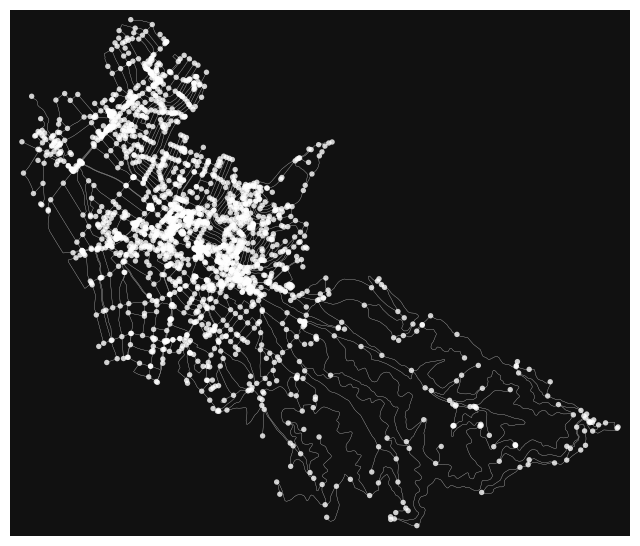

In [38]:
figure, axes = ox.plot_graph(
    gdf_eki_walk,
    #ax=axe,
    #node_color=nc,
    #node_size=ns,
    node_alpha=0.8,
    edge_linewidth=0.2,
    edge_color="#999999",
    show=False, 
    close=False
)

In [41]:
ort_in_eki_gdf

boundary          name source  \
element_type osmid                                          
relation     68452    administrative   Scherzingen    NaN   
             68453    administrative     Norsingen    NaN   
             68467    administrative  Ehrenstetten    NaN   
             301776   administrative   Offnadingen    NaN   
             1946222  administrative    Kirchhofen    NaN   

                                                               geometry note  \
element_type osmid                                                             
relation     68452    POLYGON ((7.72741 47.94288, 7.72512 47.94628, ...  NaN   
             68453    POLYGON ((7.71759 47.94234, 7.71763 47.94235, ...  NaN   
             68467    POLYGON ((7.72214 47.90799, 7.7222 47.908, 7.7...  NaN   
             301776   POLYGON ((7.70169 47.93141, 7.70294 47.93242, ...  NaN   
             1946222  MULTIPOLYGON (((7.7114 47.92558, 7.71138 47.92...  NaN   

                     alt_name    name:gsw   wikidata wikipedia     name:de  \
element_type osmid                                                           
relation     68452        NaN   Scherzige        NaN       NaN         NaN   
             68453        NaN   Norschige        NaN       NaN         NaN   
             68467        NaN         NaN        NaN       NaN         NaN   
             301776       NaN         NaN        NaN       NaN         NaN   
             1946222      NaN  Chilchhofe  Q20615851       NaN  Kirchhofen   

                      ... de:amtlicher_gemeindeschluessel name:suffix  \
element_type osmid    ...                                               
relation     68452    ...                             NaN         NaN   
             68453    ...                             NaN         NaN   
             68467    ...                             NaN         NaN   
             301776   ...                             NaN         NaN   
             1946222  ...                             NaN         NaN   

                     postal_code postal_code_level TMC:cid_58:tabcd_1:Class  \
element_type osmid                                                            
relation     68452           NaN               NaN                      NaN   
             68453           NaN               NaN                      NaN   
             68467           NaN               NaN                      NaN   
             301776          NaN               NaN                      NaN   
             1946222         NaN               NaN                      NaN   

                     TMC:cid_58:tabcd_1:LCLversion  \
element_type osmid                                   
relation     68452                             NaN   
             68453                             NaN   
             68467                             NaN   
             301776                            NaN   
             1946222                           NaN   

                     TMC:cid_58:tabcd_1:LocationCode website contact:phone  \
element_type osmid                                                           
relation     68452                               NaN     NaN           NaN   
             68453                               NaN     NaN           NaN   
             68467                               NaN     NaN           NaN   
             301776                              NaN     NaN           NaN   
             1946222                             NaN     NaN           NaN   

                     contact:website  
element_type osmid                    
relation     68452               NaN  
             68453               NaN  
             68467               NaN  
             301776              NaN  
             1946222             NaN  

[5 rows x 30 columns]

In [43]:
type(gdf_eki_build)

geopandas.geodataframe.GeoDataFrame

In [46]:
gdf_eki_build.groupby('element_type').count()

,source,geometry,nodes,amenity,building,denomination,name,religion,addr:city,addr:housenumber,...,bicycle_parking,capacity,covered,operator:wikidata,social_facility,social_facility:for,fixme,video,ways,type
element_type,,,,,,,,,,,,,,,,,,,,,
relation,1,1,1,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
way,4167,4747,4747,35,4747,9,52,9,743,805,...,1,1,1,1,1,1,2,1,0,0


In [10]:
import geopandas as gpd
import numpy
import pandas as pd
cnt={}
cnt_hn={}
cnt_hn_lu={}
cnt_lu={}

for idx_build, row_build in gdf_eki_hn.iterrows():
    poly_build=row_build['geometry']
    #poly_ort = gpd.GeoSeries(row_orte['geometry'])
    p_center=poly_build.centroid
    for idx_ort, row_ort in ort_in_eki_gdf.iterrows():
        poly_ortt = gpd.GeoSeries(row_ort['geometry'])
        if poly_ortt.contains(p_center).any():
            ort_name=row_ort['name']
            # Hausnummer nicht überallgepflegt
            #if not pd.isna(row_build['addr:housenumber']): 
            #    if ort_name in cnt_hn:
            #        cnt_hn[ort_name]=cnt_hn[ort_name]+1
            #    else:
            #        cnt_hn[ort_name]=1
            if ort_name in cnt:
                cnt_hn[ort_name]=cnt_hn[ort_name]+1
            else:
                cnt_hn[ort_name]=1
            for idx_landuse, row_landuse in gdf_eki_lu.iterrows():
                lu_type=row_landuse['landuse']
                poly_lu= gpd.GeoSeries(row_landuse['geometry'])
                if poly_lu.contains(p_center).any():
                    key=ort_name+'-'+lu_type
                    if key in cnt_hn_lu:
                        cnt_hn_lu[key]=cnt_hn_lu[key]+1
                    else:
                        cnt_hn_lu[key]=1

for idx_build, row_build in gdf_eki_build.iterrows():
    poly_build=row_build['geometry']
    #poly_ort = gpd.GeoSeries(row_orte['geometry'])
    p_center=poly_build.centroid
    for idx_ort, row_ort in ort_in_eki_gdf.iterrows():
        poly_ortt = gpd.GeoSeries(row_ort['geometry'])
        if poly_ortt.contains(p_center).any():
            ort_name=row_ort['name']
            # Hausnummer nicht überallgepflegt
            #if not pd.isna(row_build['addr:housenumber']): 
            #    if ort_name in cnt_hn:
            #        cnt_hn[ort_name]=cnt_hn[ort_name]+1
            #    else:
            #        cnt_hn[ort_name]=1
            if ort_name in cnt:
                cnt[ort_name]=cnt[ort_name]+1
            else:
                cnt[ort_name]=1
            for idx_landuse, row_landuse in gdf_eki_lu.iterrows():
                lu_type=row_landuse['landuse']
                poly_lu= gpd.GeoSeries(row_landuse['geometry'])
                if poly_lu.contains(p_center).any():
                    key=ort_name+'-'+lu_type
                    if key in cnt_lu:
                        cnt_lu[key]=cnt_lu[key]+1
                    else:
                        cnt_lu[key]=1
                    

print(cnt)
print(cnt_lu)

{'Offnadingen': 358, 'Kirchhofen': 1933, 'Ehrenstetten': 1433, 'Scherzingen': 203, 'Norsingen': 821}
{'Offnadingen-residential': 350, 'Kirchhofen-residential': 1726, 'Ehrenstetten-commercial': 6, 'Kirchhofen-farmyard': 13, 'Ehrenstetten-farmyard': 56, 'Kirchhofen-commercial': 140, 'Scherzingen-residential': 180, 'Ehrenstetten-residential': 1338, 'Ehrenstetten-industrial': 3, 'Norsingen-residential': 784, 'Scherzingen-farmyard': 10, 'Offnadingen-farmyard': 4, 'Norsingen-farmyard': 4}


In [10]:
import geopandas as gpd
import numpy
import pandas as pd
cnt={}
cnt_hn={}
cnt_hn_lu={}
cnt_lu={}

for idx_build, row_build in gdf_eki_hn.iterrows():
    poly_build=row_build['geometry']
    #poly_ort = gpd.GeoSeries(row_orte['geometry'])
    p_center=poly_build.centroid
    for idx_ort, row_ort in ort_in_eki_gdf.iterrows():
        poly_ortt = gpd.GeoSeries(row_ort['geometry'])
        if poly_ortt.contains(p_center).any():
            ort_name=row_ort['name']
            if ort_name in cnt_hn:
                cnt_hn[ort_name]=cnt_hn[ort_name]+1
            else:
                cnt_hn[ort_name]=1
            for idx_landuse, row_landuse in gdf_eki_lu.iterrows():
                lu_type=row_landuse['landuse']
                poly_lu= gpd.GeoSeries(row_landuse['geometry'])
                if poly_lu.contains(p_center).any():
                    key=ort_name+'-'+lu_type
                    if key in cnt_hn_lu:
                        cnt_hn_lu[key]=cnt_hn_lu[key]+1
                    else:
                        cnt_hn_lu[key]=1

for idx_build, row_build in gdf_eki_build.iterrows():
    poly_build=row_build['geometry']
    #poly_ort = gpd.GeoSeries(row_orte['geometry'])
    p_center=poly_build.centroid
    for idx_ort, row_ort in ort_in_eki_gdf.iterrows():
        poly_ortt = gpd.GeoSeries(row_ort['geometry'])
        if poly_ortt.contains(p_center).any():
            ort_name=row_ort['name']
            # Hausnummer nicht überallgepflegt
            #if not pd.isna(row_build['addr:housenumber']): 
            #    if ort_name in cnt_hn:
            #        cnt_hn[ort_name]=cnt_hn[ort_name]+1
            #    else:
            #        cnt_hn[ort_name]=1
            if ort_name in cnt:
                cnt[ort_name]=cnt[ort_name]+1
            else:
                cnt[ort_name]=1
            for idx_landuse, row_landuse in gdf_eki_lu.iterrows():
                lu_type=row_landuse['landuse']
                poly_lu= gpd.GeoSeries(row_landuse['geometry'])
                if poly_lu.contains(p_center).any():
                    key=ort_name+'-'+lu_type
                    if key in cnt_lu:
                        cnt_lu[key]=cnt_lu[key]+1
                    else:
                        cnt_lu[key]=1
                    

print(cnt)
print(cnt_lu)

{'Offnadingen': 358, 'Kirchhofen': 1933, 'Ehrenstetten': 1433, 'Scherzingen': 203, 'Norsingen': 821}
{'Offnadingen-residential': 350, 'Kirchhofen-residential': 1726, 'Ehrenstetten-commercial': 6, 'Kirchhofen-farmyard': 13, 'Ehrenstetten-farmyard': 56, 'Kirchhofen-commercial': 140, 'Scherzingen-residential': 180, 'Ehrenstetten-residential': 1338, 'Ehrenstetten-industrial': 3, 'Norsingen-residential': 784, 'Scherzingen-farmyard': 10, 'Offnadingen-farmyard': 4, 'Norsingen-farmyard': 4}


In [61]:
gdf_eki_lu

name  \
element_type osmid                                 
way          27646483                        NaN   
             27646534               Holzhandlung   
             30243236                        NaN   
             30243292                   Lehenhof   
             30805946                        NaN   
             31300717                        NaN   
             31671980                        NaN   
             76440805                        NaN   
             88852070                        NaN   
             113304560                       NaN   
             127409300             Oberambringen   
             128907524                       NaN   
             128907527                       NaN   
             129325927               Bittersthof   
             129325950                       NaN   
             129325958                       NaN   
             130062443                       NaN   
             130918240                       NaN   
             269402108                       NaN   
             294850925   Weingut Ernst Heinemann   
             367186714                       NaN   
             367186715                       NaN   
             374676266                       NaN   
             374676289               Scherzingen   
             538349730                       NaN   
             538390201                       NaN   
             538443262                       NaN   
             538446846                       NaN   
             538559742                       NaN   
             539944772                       NaN   
             539944792                       NaN   
             539944793                       NaN   
             638537507                       NaN   
             794058320                       NaN   
             802272731                       NaN   
             802272734                       NaN   
             808950382                       NaN   
             808950387                       NaN   
             810315844                       NaN   
             1242955598                      NaN   
relation     3144502                   Norsingen   
             3202983                         NaN   
             3259652               Oberambringen   
             7702154                         NaN   
             7726563                         NaN   
             11017490                        NaN   
             11037958                        NaN   

                                                                  geometry  \
element_type osmid                                                           
way          27646483    POLYGON ((7.73235 47.92081, 7.73225 47.92085, ...   
             27646534    POLYGON ((7.74627 47.91594, 7.74697 47.91645, ...   
             30243236    POLYGON ((7.74879 47.90581, 7.74868 47.90584, ...   
             30243292    POLYGON ((7.76967 47.90587, 7.76934 47.9058, 7...   
             30805946    POLYGON ((7.74593 47.92439, 7.74588 47.92435, ...   
             31300717    POLYGON ((7.71941 47.93686, 7.71938 47.93688, ...   
             31671980    POLYGON ((7.73618 47.94444, 7.73615 47.94441, ...   
             76440805    POLYGON ((7.71551 47.9312, 7.71558 47.93124, 7...   
             88852070    POLYGON ((7.76962 47.91889, 7.76905 47.91832, ...   
             113304560   POLYGON ((7.7655 47.91616, 7.76488 47.91586, 7...   
             127409300   POLYGON ((7.74488 47.9167, 7.74472 47.91676, 7...   
             128907524   POLYGON ((7.77247 47.90479, 7.77222 47.90454, ...   
             128907527   POLYGON ((7.76577 47.91269, 7.76587 47.91264, ...   
             129325927   POLYGON ((7.83194 47.89656, 7.83145 47.89669, ...   
             129325950   POLYGON ((7.83421 47.89223, 7.83405 47.8921, 7...   
             129325958   POLYGON ((7.8353 47.89167, 7.83546 47.89177, 7...   
             130062443   POLYGON ((7.75429 47.90499, 7.75371 47.90528, ...   
             

In [ ]:
# Nutzen von poi=ox.distance.nearest_nodes(roads, cur["lng"],cur["lat"])
# Damit wird der nächste Weg zum Gebäude gefunden und dieser hat eine Entfernung zur Schule hinterlegt.
# Danach wird der Wert nach Ort und Landuse gezählt.

In [33]:
import itertools
#dir(ort_in_eki_gdf['name'])
x=ort_in_eki_gdf['name'].values
dir(gdf_eki_lu['landuse'].values)
y=numpy.unique(gdf_eki_lu['landuse'].values)


z=numpy.transpose([numpy.tile(x, len(y)), numpy.repeat(y, len(x))])


In [38]:
z
x=ort_in_eki_gdf['name'].values
y=pd.Series(trip_times)

cart=numpy.transpose([numpy.tile(x, len(y)), numpy.repeat(y, len(x))])
cart

array([['Scherzingen', 5],
       ['Norsingen', 5],
       ['Ehrenstetten', 5],
       ['Offnadingen', 5],
       ['Kirchhofen', 5],
       ['Scherzingen', 10],
       ['Norsingen', 10],
       ['Ehrenstetten', 10],
       ['Offnadingen', 10],
       ['Kirchhofen', 10],
       ['Scherzingen', 15],
       ['Norsingen', 15],
       ['Ehrenstetten', 15],
       ['Offnadingen', 15],
       ['Kirchhofen', 15],
       ['Scherzingen', 20],
       ['Norsingen', 20],
       ['Ehrenstetten', 20],
       ['Offnadingen', 20],
       ['Kirchhofen', 20],
       ['Scherzingen', 25],
       ['Norsingen', 25],
       ['Ehrenstetten', 25],
       ['Offnadingen', 25],
       ['Kirchhofen', 25],
       ['Scherzingen', 30],
       ['Norsingen', 30],
       ['Ehrenstetten', 30],
       ['Offnadingen', 30],
       ['Kirchhofen', 30],
       ['Scherzingen', 40],
       ['Norsingen', 40],
       ['Ehrenstetten', 40],
       ['Offnadingen', 40],
       ['Kirchhofen', 40]], dtype=object)

In [ ]:
# Ziel ist eine Tabelle mit:
#                x Entfernung
# Ort, Landuse   x Anzahl Gebäude         